# Summer School on Biomedical Imaging with Deep Learning

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/albarqounilab/BILD-Summer-School/blob/main/notebooks/day1/cnn_classification_solution.ipynb)

![alt_text](https://raw.githubusercontent.com/albarqounilab/BILD-Summer-School/refs/heads/main/images/helpers/notebook-banner.png)

BILD 2025 is organized under the umbrella of the [Strategic Arab-German Network for Affordable and Democratized AI in Healthcare (SANAD)](https://albarqouni.github.io/funded/sanad/), uniting academic excellence and technological innovation across borders. This year’s edition is organized by the [Albarqouni Lab](https://albarqouni.github.io/) at the [University Hospital Bonn](https://www.ukbonn.de/) and the [University of Bonn](https://www.uni-bonn.de/en). We are proud to partner with leading institutions in the region—Lebanese American University, University of Tunis El Manar, and Duhok Polytechnic University — to deliver a truly international learning experience. Over five intensive days in Tunis, you will explore cutting-edge deep-learning techniques for medical imaging through expert lectures, hands-on labs, and collaborative case studies. Engage with peers and faculty from Germany, Lebanon, Iraq, and Tunisia as you develop practical skills in building and deploying AI models for real-world healthcare challenges. We look forward to an inspiring week of interdisciplinary exchange and the shared commitment to advancing affordable, life-saving AI in medicine.


## Chest-X-Ray Classification and Detection [60 mins]

### Introduction

This notebook contains practical hands-on exercises for the lesson about *Convolutional Neural Networks for Classification and Detection*.

In this lesson, we leverage two complementary chest‑radiograph datasets for binary pathology analysis:

- **NIH ChestX‑ray14**  
  The NIH ChestX‑ray14 dataset comprises 112 ,120 frontal‑view X‑ray images from 30 ,805 patients. It provides labels for 14 common thoracic pathologies and includes roughly 1 ,000 bounding‑box annotations (in `BBox_List_2017.csv`), which is useful for preliminary localization but too sparse for robust object‑detection training.

- **RSNA Pneumonia Detection Challenge**  
  The RSNA dataset contains about 30 ,000 DICOM‑format chest X‑rays with expert‑drawn bounding boxes around pneumonia opacities, making it ideally suited for training and evaluating bounding‑box detection models (e.g., Faster R‑CNN, anchor‑free detectors).


1. **Dataset.**
   - First we will use the dataset from the [NIH ChestX-ray-14](https://nihcc.app.box.com/v/ChestXray-NIHCC).
   - All images are in .png format; load them using an appropriate library (e.g., `PIL`).
   - Inspect the the `metadata.csv` file, and handle the target class:
     - `Patient ID` – unique identifier for each image.
     - `Finding Labels` – target category (pathology).
     - `x`, `y`, `width`, `height` – bounding‑box coordinates.
     - Other demographic columns.
   - Implement a custom `torch.utils.data.Dataset` to load images and bounding‑box labels.
   - Create training, validation, and test splits and verify sample shapes/types with `DataLoader`s.
2. **Classification.**
   - Fine‑tune pretrained CNNs (e.g., DenseNet, VisionTransformer) to classify pathology vs. healthy control.
   - Adapt final layers for binary classification.
   - Implement training/validation loops using metrics such as accuracy and ROC‑AUC.
   - Record and compare performance across different architectures.

3. **Detection.**
   - Explore `torchvision.models.detection` (e.g., Faster R‑CNN, RetinaNet).
   - Modify the model for single‑class bounding‑box prediction.
   - Complete training/validation loops with appropriate losses (e.g., classification + box regression).
   - Evaluate precision, recall, and mean Average Precision (mAP) at standard IoU thresholds.

4. **Evaluation and Reporting.**
   - Summarize classification and detection results on the test set.
   - Report key metrics: accuracy, ROC‑AUC, mAP, IoU.
   - Visualize examples of correct and incorrect predictions for both tasks.
   - Present a summary table comparing all models across these metrics.


Complete the following sections:

After this session, you will know how to fine‑tune a pretrained CNN on a real-world clinical problem:
* Classifying pathology vs. healthy control from chest X-rays using different model architectures.
* Building a model to detect pathology from chest X-rays using different model architectures.
* Reporting evaluation metrics and justifying the choice of model architecture.

## Dataset

[NIH ChestX-ray-14](https://nihcc.app.box.com/v/ChestXray-NIHCC) dataset comprises 112,120 frontal-view X-ray images of 30,805 unique patients with the text-mined fourteen disease image labels (where each image can have multi-labels), mined from the associated radiological reports using natural language processing.
Fourteen common thoracic pathologies include Atelectasis, Consolidation, Infiltration, Pneumothorax, Edema, Emphysema, Fibrosis, Effusion, Pneumonia, Pleural_thickening, Cardiomegaly, Nodule, Mass and Hernia.

It initially contains:
1. 112,120 frontal-view chest X-ray PNG images in 1024*1024 resolution (under images folder)
2. Meta data for all images (Data_Entry_2017.csv): Image Index, Finding Labels, Follow-up #, Patient ID, Patient Age, Patient Gender, View Position, Original Image Size and Original Image Pixel Spacing.
3. Bounding boxes for ~1000 images (BBox_List_2017.csv): Image Index, Finding Label, Bbox[x, y, w, h]. [x y] are coordinates of each box's topleft corner. [w h] represent the width and height of each box.
4. Two data split files (train_val_list.txt and test_list.txt) are provided. Images in the ChestX-ray dataset are divided into these two sets on the patient level. All studies from the same patient will only appear in either training/validation or testing set.

Here, we will use a subsample of this dataset along with pretrained models.

In [ ]:
#@title Import data from Drive folder | Colab notebooks
import gdown
import os

# Google Drive folder ID
folder_id = '1P6SRWtzniL8VRrj9LT8PxsmXZP3au3uh'
folder_id_2 = '1_M1d2Bm4ovoFMYHD1rYJIhPkY1ANPK0v'

# Destination path in Colab
DATA_PATH = './'
os.makedirs(DATA_PATH, exist_ok=True)

try:
    print(f"Downloading folder ID: {folder_id} to {DATA_PATH}")
    gdown.download_folder(id=folder_id, output=DATA_PATH, quiet=False, use_cookies=False)
    print(f"Downloading folder ID 2: {folder_id_2} to {DATA_PATH}")
    gdown.download_folder(id=folder_id_2, output=DATA_PATH, quiet=False, use_cookies=False)
    print("Download complete.")
except Exception as e:
    print(f"An error occurred during download: {e}")
    print("Please ensure the Google Drive folder is shared correctly and try again.")

In [ ]:
#@title alternative link
# ChestX-ray14
#!curl https://uni-bonn.sciebo.de/s/J3GFK3bsHGDfwAC/download/data_cxr8.zip --output {DATA_PATH}/data.zip #About 70GB!
#!unzip {DATA_PATH}/data.zip -d {DATA_PATH}
## Splits proposed in the dataset task
#!curl https://uni-bonn.sciebo.de/s/K7s3M8dyTGdMmxq/download --output {DATA_PATH}/train_val_list.txt
#!curl https://uni-bonn.sciebo.de/s/WawtPCxBGrZ4r33/download --output {DATA_PATH}/test_list.txt
## model weights
##https://uni-bonn.sciebo.de/s/ZJqSBJDcdfa6LY7/download/densenet121-classification.pth --output ./densenet121-classification.pth
##https://uni-bonn.sciebo.de/s/2fwbiwH9CjHBPPm/download/efficientnet-classification.pth --output ./efficientnet-classification.pth
##https://uni-bonn.sciebo.de/s/mkJ5qwLAcHZ5QTk/download/swintransformer-classification.pth --output ./swintransformer-classification.pth

# RSNA Pneumonia Detection Challenge
#!curl https://uni-bonn.sciebo.de/s/qAeDDC5HkigwF5c/download --output {DATA_PATH}/data/rsna-pneumonia-detection-challenge.zip
#!unzip {DATA_PATH}/data/rsna-pneumonia-detection-challenge.zip -d {DATA_PATH}/data


# Classification

## Import essentials

In [ ]:
#@title import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import warnings
warnings.filterwarnings('ignore')

from glob import glob
import time
import cv2
import re
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import tv_tensors
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import pydicom # Added import for pydicom

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

from torchvision import transforms, models
from PIL import Image
import random
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torch.optim.lr_scheduler import OneCycleLR

from sklearn.metrics import accuracy_score
from torchmetrics.classification import BinaryAUROC

### Download

If needed, run the following cells to download and unzip the dataset.

<div class="alert alert-block alert-danger">
<b>Replace the <code>DATA_PATH</code> with the path where you want to store the data folder. By default, it will be stored at the root of this repository.</b> <br>
<b>If you have already downloaded the dataset, comment the following cell by adding a <code>#</code> before the <code>!</code></b>
</div>

In [ ]:
DATA_PATH = './'
# !curl https://uni-bonn.sciebo.de/s/s1t8QUZ02MF1Qoh/download --output {DATA_PATH}/data.zip
# !unzip {DATA_PATH}/data.zip -d {DATA_PATH}

In [ ]:
# Splits proposed in the dataset task
!curl https://uni-bonn.sciebo.de/s/K7s3M8dyTGdMmxq/download --output {DATA_PATH}/train_val_list.txt
!curl https://uni-bonn.sciebo.de/s/WawtPCxBGrZ4r33/download --output {DATA_PATH}/test_list.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1436k  100 1436k    0     0  4688k      0 --:--:-- --:--:-- --:--:-- 4678k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  424k  100  424k    0     0  1544k      0 --:--:-- --:--:-- --:--:-- 1545k


### Load patient's splits

In [ ]:
train_val_patients = pd.read_csv(f'{DATA_PATH}/train_val_list.txt', header=None, names=['patientId'])
test_patients = pd.read_csv(f'{DATA_PATH}/test_list.txt', header=None, names=['patientId'])

print(f"Number of patients in train/val set: {len(train_val_patients)}")
print(f"Number of patients in test set: {len(test_patients)}")

Number of patients in train/val set: 86524
Number of patients in test set: 25596


these `.txt` files correspond to lists of `Image Index` which we will match with our  database `metadata.csv`

### Load dataframe metadata

In [ ]:
# Load and observe available data
metadata_df = pd.read_csv(f'{DATA_PATH}/data/CXR8/metadata.csv')
metadata_df#.head() # Print the 5 fist rows of the dataframe

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


Match the dataframe with the actual downloaded images

In [ ]:
imgs = glob(f'{DATA_PATH}/data/CXR8/images/*')
imgs_basename = [os.path.basename(i) for i in imgs]

metadata_df = metadata_df.loc[metadata_df['Image Index'].isin(imgs_basename)]
metadata_df.shape

(92120, 11)

### Handle targets

In the following cell, we need to handle rare classes for stratification and get the counts of each finding label

In [ ]:
label_counts = metadata_df['Finding Labels'].value_counts()
label_counts

Finding Labels
No Finding                                                        49553
Infiltration                                                       8099
Atelectasis                                                        3491
Effusion                                                           3139
Nodule                                                             2259
                                                                  ...  
Atelectasis|Consolidation|Edema|Effusion|Pneumonia                    1
Cardiomegaly|Effusion|Fibrosis|Mass                                   1
Cardiomegaly|Edema|Effusion|Fibrosis|Hernia                           1
Consolidation|Effusion|Emphysema|Infiltration                         1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax        1
Name: count, Length: 777, dtype: int64

We can see there are many samples with multiple labels, for simplicity we will remove all labels we find with less than 1500 samples

We will end up with:
```
Finding Labels
No Finding      49553
Infiltration     8099
Atelectasis      3491
Effusion         3139
Nodule           2259
Pneumothorax     1848
Mass             1728
Name: count, dtype: int64
```



First we inspect the current label counts:

In [ ]:
label_counts = metadata_df['Finding Labels'].value_counts()
rare_labels = label_counts[label_counts < 1500].index

Now we filter the DataFrame to exclude rare labels


In [ ]:
metadata_df_filtered = metadata_df[~metadata_df['Finding Labels'].isin(rare_labels)].copy()

print(f"Original shape: {metadata_df.shape}")
print(f"Filtered shape: {metadata_df_filtered.shape}")

Original shape: (92120, 11)
Filtered shape: (70117, 11)


In [ ]:
metadata_df_filtered['Finding Labels'].value_counts()

Finding Labels
No Finding      49553
Infiltration     8099
Atelectasis      3491
Effusion         3139
Nodule           2259
Pneumothorax     1848
Mass             1728
Name: count, dtype: int64

To collapse the NIH ChestX‑ray14 labels into a single “normal vs. abnormal” binary task, the simplest and most common criterion is:

- “Any Finding” vs. “No Finding.”
• Class 0 (Negative): images labeled No Finding
• Class 1 (Positive): images with any of the 14 disease labels

This turns your multi‑label problem into a binary one: “healthy” versus “pathology present.” Here, we need to decide our target class to focus on e.g. `Effusion`.

 You may try with more classes and evaluate the behavior of the model under more fine-grained classes

In [ ]:
keep = {
    'No Finding', 'Effusion',
}

# split each cell into a list, then keep rows where at least one element is in `keep`
df_filtered = metadata_df_filtered[
    metadata_df_filtered['Finding Labels']
      .str.split('|')                         # or .str.split(',') if comma‑separated
      .apply(lambda labels: any(lbl in keep for lbl in labels))
].copy()
df_filtered['Finding Labels'].value_counts()

Finding Labels
No Finding    49553
Effusion       3139
Name: count, dtype: int64

Now we create our `Binary Label` column

In [ ]:
df_filtered['Binary Label'] = (df_filtered['Finding Labels'] != 'No Finding').astype(int)
df_filtered['Binary Label'].value_counts()

Binary Label
0    49553
1     3139
Name: count, dtype: int64

We could further clean our dataset by only choosing one view aquisition in our classifier

In [ ]:
df_filtered = df_filtered[df_filtered["View Position"] == 'PA']
df_filtered['View Position'].value_counts()

View Position
PA    34135
Name: count, dtype: int64

Now we retrieve the patient slit from the database (train-test) and make it effective in our dataframe

In [ ]:
# Split df_filtered based on patient IDs from the loaded lists
train_val_df = df_filtered[df_filtered['Image Index'].isin(train_val_patients['patientId'])].copy()
test_df = df_filtered[df_filtered['Image Index'].isin(test_patients['patientId'])].copy()

print(f"Train val shape: {train_val_df.shape}")
print(f"Test set shape: {test_df.shape}")

Train val shape: (29674, 12)
Test set shape: (4461, 12)


### Split subset

With this cell we will train on a subset of the data controlled by the `n_samples` and the `test_size` values. In our case we will do `3000 and 0.2 test - 0.1 validation`

In [ ]:
df = train_val_df.copy()
pos = df[df['Binary Label'] == 1]
neg = df[df['Binary Label'] == 0]

# # sample up to x each
n_samples = 3000
pos = pos.sample(n=min(len(pos), n_samples), random_state=42)
neg = neg.sample(n=min(len(neg), n_samples), random_state=42)

subset = pd.concat([pos, neg]).reset_index(drop=True)
print("Subset size:", subset.shape)
print(subset['Binary Label'].value_counts())

# %%
train_validation_df, test_df = train_test_split(
    subset,
    test_size=0.2,
    stratify=subset['Binary Label'],
    random_state=42
)
train_df, val_df = train_test_split(
    train_validation_df,
    test_size=0.1,
    stratify=train_validation_df['Binary Label'],
    random_state=42
)
print("Train:", train_df.shape, "Validation:", val_df.shape)

Subset size: (4284, 12)
Binary Label
0    3000
1    1284
Name: count, dtype: int64
Train: (3084, 12) Validation: (343, 12)


### Download the pretrained model

In [ ]:
# !curl https://uni-bonn.sciebo.de/s/ZJqSBJDcdfa6LY7/download/densenet121-classification.pth --output ./densenet121-classification.pth
# !curl https://uni-bonn.sciebo.de/s/2fwbiwH9CjHBPPm/download/efficientnet-classification.pth --output ./efficientnet-classification.pth
# !curl https://uni-bonn.sciebo.de/s/mkJ5qwLAcHZ5QTk/download/swintransformer-classification.pth --output ./swintransformer-classification.pth

### Classification

We'll delve into the power of deep models like CNNs, leveraging the PyTorch library as our framework. PyTorch provides the flexibility and tools necessary to explore and implement these complex architectures for challenging tasks.

### Datasets in PyTorch
Next we define our custom `ChestXrayDataset` using torch `Dataset` from `torch.utils.data`

In [ ]:
class ChestXrayDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['Image Index'])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(row['Binary Label'], dtype=torch.float32)
        return image, label

Transforms are modifications made to the samples during loading. During training, it can include some data augmentation strategies.

For instance:

```
    transforms.Resize((image_size_,image_size_)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
```


In [ ]:
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

image_size_= 224

train_transforms = transforms.Compose([
    transforms.Resize((image_size_,image_size_)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])


Now the `val_transforms`

In [ ]:
val_transforms   = transforms.Compose([
    transforms.Resize((image_size_,image_size_)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

### Dataloaders

In [ ]:
img_dir  = f'{DATA_PATH}/data/CXR8/images'

train_ds = ChestXrayDataset(train_df, img_dir, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=90, pin_memory=True)

We pass the `Dataset` as an argument to `DataLoader`. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 32, *i.e.* each element in the dataloader iterable will return a batch of 32 features and labels.

In [ ]:
for X, y in train_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 224, 224])
Shape of y: torch.Size([64]) torch.float32


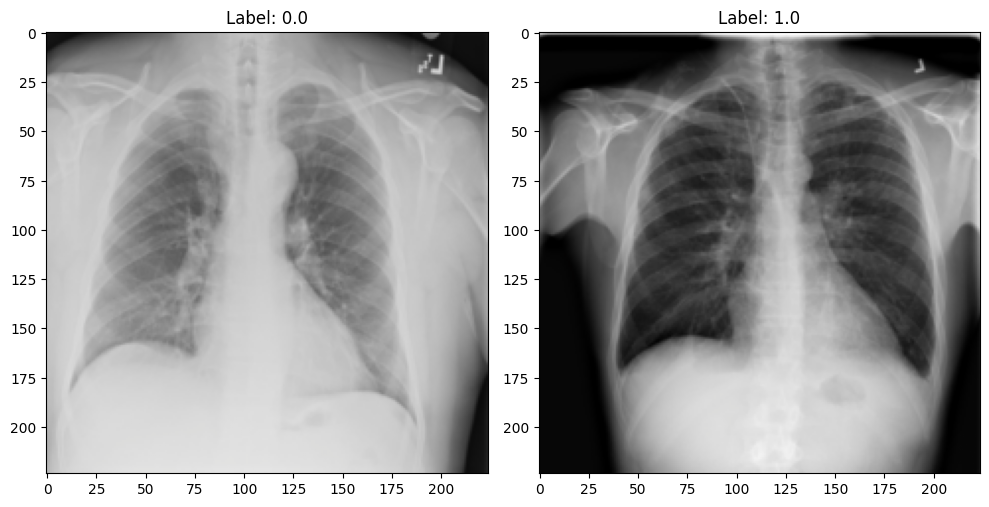

In [ ]:
IMAGENET_MEAN = np.array([0.485, 0.456, 0.406], dtype=np.float32)
IMAGENET_STD  = np.array([0.229, 0.224, 0.225], dtype=np.float32)

In [ ]:
val_ds   = ChestXrayDataset(val_df,   img_dir, transform=val_transforms)
val_loader   = DataLoader(val_ds,   batch_size=32, num_workers=32, pin_memory=True)

# Loading pretrained models with PyTorch

The `torchvision.models` subpackage contains definitions of models for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection, video classification, and optical flow.

TorchVision offers a new mechanism which allows listing and retrieving models and weights by their names. Here are a few examples on how to use them:

In [ ]:
torchvision.models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 1)
model = model.to(device)
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates.

We define the following hyperparameters for training:
* Number of Epochs - the number of times to iterate over the dataset
* Batch Size - the number of data samples propagated through the network before the parameters are updated
* Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 10

### Optimization loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

Each epoch consists of two main parts:
* The Train Loop - iterate over the training dataset and try to converge to optimal parameters.
* The Validation/Test Loop - iterate over the test dataset to check if model performance is improving on unseen data.

When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

We pass our model’s output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In order to mitigate imbalance towards the minority class, we use the `pos_weight` parameter to penalize the majority class.

In [ ]:
pos_frac = train_df['Binary Label'].mean()
pos_weight = torch.tensor([(1 - pos_frac) / pos_frac]).to(device)

criterion  = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

Inside the training loop, optimization happens in three steps:
* Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
* We call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.
* Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.
* Call `OneCycleLR` scheduler to improve the training process.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = OneCycleLR(optimizer, max_lr=learning_rate, epochs=epochs, steps_per_epoch=len(train_loader), total_steps=epochs * len(train_loader))

Next we will define our train and validation functions. Take a look a the differences and similarities between the two

In [ ]:
def train_loop(model, loader, criterion, optimizer, scheduler, device):
    model.train()
    running_loss = 0.0
    for imgs, labels in tqdm(loader, desc="  Training", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(imgs).squeeze(1)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        try:
            scheduler.step()
        except ValueError:
            pass

        running_loss += loss.item() * imgs.size(0)

    avg_loss = running_loss / len(loader.dataset)
    return avg_loss


def val_loop(model, loader, criterion, auroc, device):
    model.eval()
    auroc.reset()
    running_preds = []
    running_labels = []

    with torch.no_grad():
        for imgs, labels in tqdm(loader, desc="  Validation", leave=False):
            imgs = imgs.to(device)
            logits = model(imgs).squeeze(1)
            probs = torch.sigmoid(logits)

            preds = (probs > 0.5).int().cpu().numpy()
            running_preds.extend(preds.tolist())
            running_labels.extend(labels.int().tolist())

            auroc.update(probs, labels.int().to(device))

    acc = accuracy_score(running_labels, running_preds)
    val_auroc = auroc.compute().item()
    return acc, val_auroc


In [ ]:

img_dir  = f'{DATA_PATH}/data/CXR8/images'

train_ds = ChestXrayDataset(train_df, img_dir, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=90, pin_memory=True)

val_ds   = ChestXrayDataset(val_df,   img_dir, transform=val_transforms)
val_loader   = DataLoader(val_ds,   batch_size=32, num_workers=32, pin_memory=True)

auroc = BinaryAUROC().to(device)

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")

    train_loss = train_loop(model, train_loader, criterion, optimizer, scheduler, device)
    val_acc, val_auroc = val_loop(model, val_loader, criterion, auroc, device)

    print(f"  Train Loss: {train_loss:.4f}  |  Val Acc: {val_acc:.4f}  |  Val AUROC: {val_auroc:.4f}")

Epoch 1/10


  Train Loss: 0.7583  |  Val Acc: 0.8076  |  Val AUROC: 0.8582
Epoch 2/10


  Train Loss: 0.5954  |  Val Acc: 0.4781  |  Val AUROC: 0.8813
Epoch 3/10


  Train Loss: 0.5755  |  Val Acc: 0.4461  |  Val AUROC: 0.8771
Epoch 4/10


  Train Loss: 0.5728  |  Val Acc: 0.8192  |  Val AUROC: 0.8544
Epoch 5/10


  Train Loss: 0.5282  |  Val Acc: 0.8513  |  Val AUROC: 0.8993
Epoch 6/10


  Train Loss: 0.4742  |  Val Acc: 0.8455  |  Val AUROC: 0.8873
Epoch 7/10


  Train Loss: 0.4415  |  Val Acc: 0.8192  |  Val AUROC: 0.8982
Epoch 8/10


  Train Loss: 0.3718  |  Val Acc: 0.8455  |  Val AUROC: 0.8870
Epoch 9/10


  Train Loss: 0.3135  |  Val Acc: 0.8309  |  Val AUROC: 0.8946
Epoch 10/10


  Train Loss: 0.2677  |  Val Acc: 0.8367  |  Val AUROC: 0.8949


In [ ]:
# Save the trained model
torch.save(model.state_dict(), './densenet121-classification.pth')
print("Model saved successfully!")

Model saved successfully!


### Benchmarking model architectures

CNN architectures differ primarily in their layer arrangements, use of skip connections, and strategies for dealing with vanishing gradients, impacting their ability to scale and learn complex features. Some architectures, like ResNet, use skip connections to bypass layers, enabling deeper networks without vanishing gradients, while others, like DenseNet, employ dense connectivity within blocks. Other variations include Inception modules for parallel processing and feature combination, and normalization layers to stabilize training.

In the following, you will train different model architecture and compare the performance you obtain on the validation set.

<div class="alert alert-block alert-info">
<b>Q3.</b> Complete the following cells to train other model architectures: <br>
    - EfficientNet <br>
    - Swin transformer <br>
</div>

### EfficientNet

In [ ]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_enb0 = efficientnet_b0(weights='DEFAULT')
model_enb0.classifier[1] = nn.Linear(1280, 1)

model = model_enb0.to(device)
print(model)

learning_rate = 1e-3
batch_size = 64
epochs = 10

pos_frac = train_df['Binary Label'].mean()
pos_weight = torch.tensor([(1 - pos_frac) / pos_frac]).to(device)
criterion  = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
scheduler = OneCycleLR(optimizer, max_lr=learning_rate, epochs=epochs, steps_per_epoch=len(train_loader), total_steps=epochs * len(train_loader)) # Explicitly set total_steps

img_dir  = f'{DATA_PATH}/data/CXR8/images'

train_ds = ChestXrayDataset(train_df, img_dir, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=90, pin_memory=True)

val_ds   = ChestXrayDataset(val_df,   img_dir, transform=val_transforms)
val_loader   = DataLoader(val_ds,   batch_size=32, num_workers=32, pin_memory=True)

auroc = BinaryAUROC().to(device)

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")

    train_loss = train_loop(model, train_loader, criterion, optimizer, scheduler, device)
    val_acc, val_auroc = val_loop(model, val_loader, criterion, auroc, device)

    print(f"  Train Loss: {train_loss:.4f}  |  Val Acc: {val_acc:.4f}  |  Val AUROC: {val_auroc:.4f}")

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

  Train Loss: 0.8551  |  Val Acc: 0.7522  |  Val AUROC: 0.8459
Epoch 2/10


  Train Loss: 0.5895  |  Val Acc: 0.6939  |  Val AUROC: 0.8797
Epoch 3/10


  Train Loss: 0.5616  |  Val Acc: 0.8251  |  Val AUROC: 0.8970
Epoch 4/10


  Train Loss: 0.5101  |  Val Acc: 0.8484  |  Val AUROC: 0.8949
Epoch 5/10


  Train Loss: 0.4756  |  Val Acc: 0.8513  |  Val AUROC: 0.9066
Epoch 6/10


  Train Loss: 0.4218  |  Val Acc: 0.8280  |  Val AUROC: 0.9094
Epoch 7/10


  Train Loss: 0.3758  |  Val Acc: 0.8338  |  Val AUROC: 0.9074
Epoch 8/10


  Train Loss: 0.3038  |  Val Acc: 0.8513  |  Val AUROC: 0.9156
Epoch 9/10


  Train Loss: 0.2492  |  Val Acc: 0.8426  |  Val AUROC: 0.9142
Epoch 10/10


  Train Loss: 0.2312  |  Val Acc: 0.8513  |  Val AUROC: 0.9153


Save the trained model

In [ ]:
torch.save(model.state_dict(), './efficientnet-classification.pth')
print("Model saved successfully!")

Model saved successfully!


### SwinTransformer

In [ ]:
from torchvision.models import swin_t, Swin_T_Weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_swin = swin_t(weights='DEFAULT')
model_swin.head = nn.Linear(in_features=768, out_features=1, bias=True)
model = model_swin.to(device)
print(model)

learning_rate = 1e-3
batch_size = 64
epochs = 10

pos_frac = train_df['Binary Label'].mean()
pos_weight = torch.tensor([(1 - pos_frac) / pos_frac]).to(device)
criterion  = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
scheduler = OneCycleLR(optimizer, max_lr=learning_rate, epochs=epochs, steps_per_epoch=len(train_loader), total_steps=epochs * len(train_loader)) # Explicitly set total_steps

img_dir  = f'{DATA_PATH}/data/CXR8/images'

train_ds = ChestXrayDataset(train_df, img_dir, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=90, pin_memory=True)

val_ds   = ChestXrayDataset(val_df,   img_dir, transform=val_transforms)
val_loader   = DataLoader(val_ds,   batch_size=32, num_workers=32, pin_memory=True)

auroc = BinaryAUROC().to(device)

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")

    train_loss = train_loop(model, train_loader, criterion, optimizer, scheduler, device)
    val_acc, val_auroc = val_loop(model, val_loader, criterion, auroc, device)

    print(f"  Train Loss: {train_loss:.4f}  |  Val Acc: {val_acc:.4f}  |  Val AUROC: {val_auroc:.4f}")

SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlock(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttention(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=384, out_features=96, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (1): SwinTransformerBlock(
       

  Train Loss: 0.7774  |  Val Acc: 0.7668  |  Val AUROC: 0.8487
Epoch 2/10


  Train Loss: 0.7689  |  Val Acc: 0.8105  |  Val AUROC: 0.8488
Epoch 3/10


  Train Loss: 0.7750  |  Val Acc: 0.8047  |  Val AUROC: 0.8429
Epoch 4/10


  Train Loss: 0.7090  |  Val Acc: 0.8017  |  Val AUROC: 0.8656
Epoch 5/10


  Train Loss: 0.6766  |  Val Acc: 0.8047  |  Val AUROC: 0.8402
Epoch 6/10


  Train Loss: 0.6341  |  Val Acc: 0.8192  |  Val AUROC: 0.8655
Epoch 7/10


  Train Loss: 0.5643  |  Val Acc: 0.8338  |  Val AUROC: 0.8927
Epoch 8/10


  Train Loss: 0.5432  |  Val Acc: 0.8367  |  Val AUROC: 0.8938
Epoch 9/10


  Train Loss: 0.5116  |  Val Acc: 0.8222  |  Val AUROC: 0.8855
Epoch 10/10


  Train Loss: 0.4928  |  Val Acc: 0.8192  |  Val AUROC: 0.8867


Save the trained model

In [ ]:
torch.save(model.state_dict(), './swintransformer-classification.pth')
print("Model saved successfully!")

Model saved successfully!


#### Metrics

Now that we have trained our models, we can evaluate their performance on the validation set using different metrics to select the best performing one.

<div class="alert alert-block alert-info">
<b>Q4.</b> Compare the performance of the four models using appropriate metrics: <br>
    - Plot the ROC curve <br>
    - Accuracy score <br>
    - Precision and Recall <br>
    - F1-score <br>
</div>

Load the saved models

In [ ]:
model_densenet = models.densenet121(pretrained=True)
model_densenet.classifier = nn.Linear(model.classifier.in_features, 1)

model_enb0 = models.efficientnet_b0(weights=None)
model_enb0.classifier[1] = nn.Linear(1280, 1)

model_swin = models.swin_t(weights=None)
model_swin.head = nn.Linear(in_features=768, out_features= 1, bias=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_densenet.load_state_dict(torch.load('./densenet121-classification.pth', map_location=device))
model_enb0.load_state_dict(torch.load('./efficientnet-classification.pth', map_location=device))
model_swin.load_state_dict(torch.load('./swintransformer-classification.pth', map_location=device))


<All keys matched successfully>

Now lets compute the metrics and plot all models:

Model: DenseNet 121
  Accuracy : 0.8693
  Precision: 0.7544
  Recall   : 0.8366
  F1-score : 0.7934
  ROC AUC  : 0.9158
------------------------------
Model: EfficientNet B0
  Accuracy : 0.8623
  Precision: 0.7324
  Recall   : 0.8521
  F1-score : 0.7878
  ROC AUC  : 0.9141
------------------------------
Model: Swin Transformer
  Accuracy : 0.8576
  Precision: 0.7288
  Recall   : 0.8366
  F1-score : 0.7790
  ROC AUC  : 0.9101
------------------------------


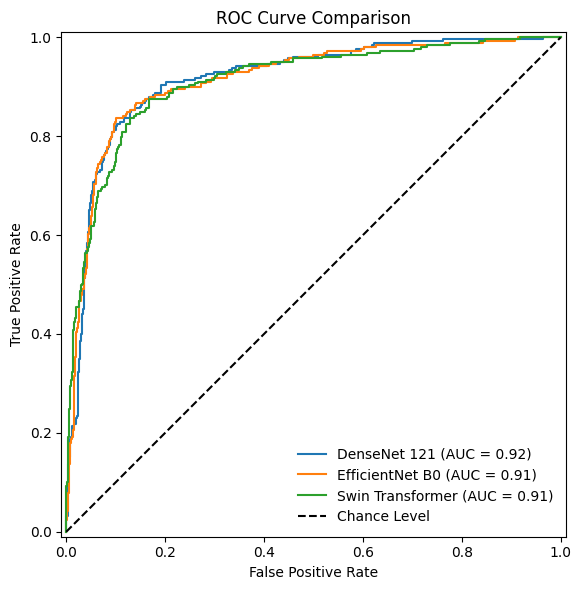

In [ ]:
test_ds     = ChestXrayDataset(test_df, img_dir, transform=val_transforms)
test_loader = DataLoader(
    test_ds,
    batch_size=32,
    num_workers=32,
    pin_memory=True,
    shuffle=False
)

model_list  = [model_densenet, model_enb0, model_swin]
model_names = ['DenseNet 121', 'EfficientNet B0', 'Swin Transformer']

all_preds_proba = {}
all_labels      = None

for model, name in zip(model_list, model_names):
    model.eval()
    model.to(device)

    probs_list, labels_list = [], []

    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            out = model(X)
            probs = torch.sigmoid(out)
            probs = probs.squeeze(1)
            probs_list.extend(probs.cpu().numpy())
            labels_list.extend(y.numpy())

    preds_proba = np.array(probs_list)
    labels      = np.array(labels_list)

    all_preds_proba[name] = preds_proba
    if all_labels is None:
        all_labels = labels

    preds_binary = (preds_proba > 0.5).astype(int)

    acc     = accuracy_score(labels, preds_binary)
    prec    = precision_score(labels, preds_binary)
    rec     = recall_score(labels, preds_binary)
    f1      = f1_score(labels, preds_binary)
    roc_auc = roc_auc_score(labels, preds_proba)

    print(f"Model: {name}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}")
    print(f"  ROC AUC  : {roc_auc:.4f}")
    print("-" * 30)

plt.figure(figsize=(8, 6))
ax = plt.gca()

for name, preds_proba in all_preds_proba.items():
    RocCurveDisplay.from_predictions(
        all_labels,
        preds_proba,
        name=name,
        plot_chance_level=False,
        ax=ax
    )

plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Conclude:</b> Which model gives the best performance and should be selected?
</div>

# Detection

Now that we have seen how to perform classification, we will train a detection model.
In classification, our goal was simply to assign a single label to the entire input (e.g., “normal” vs. pathology), relying on feature
extractors like ResNet or EfficientNet to encode global image cues. By contrast, detection requires both identifying and localizing multiple regions of interest—such as nodules, organs, or lesions—within a single image.

We will use the dataset from the [RSNA Pneumonia Detection Challenge](https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/overview).

When making predictions, scientist should predict as many bounding boxes as they feel are necessary, in the format:
confidence x-min y-min width height

All provided images are in DICOM format. Data fields availables in the `BBox_List_2017.csv` file are the following:
* patientId _- A patientId. Each patientId corresponds to a unique image.
* x_ - the upper-left x coordinate of the bounding box.
* y_ - the upper-left y coordinate of the bounding box.
* width_ - the width of the bounding box.
* height_ - the height of the bounding box.
* Target_ - the binary Target, indicating whether this sample has evidence of pathology.

## Import essentials

### Dataset
We will use the dataset from the [RSNA Pneumonia Detection Challenge](https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/overview).

In this challenge competitors are predicting whether pneumonia exists in a given image. They do so by predicting bounding boxes around areas of the lung. Samples without bounding boxes are negative and contain no definitive evidence of pneumonia. Samples with bounding boxes indicate evidence of pneumonia.

When making predictions, competitors should predict as many bounding boxes as they feel are necessary, in the format:
confidence x-min y-min width height

All provided images are in DICOM format. Data fields availables in the `labels.csv` file are the following:
* patientId _- A patientId. Each patientId corresponds to a unique image.
* x_ - the upper-left x coordinate of the bounding box.
* y_ - the upper-left y coordinate of the bounding box.
* width_ - the width of the bounding box.
* height_ - the height of the bounding box.
* Target_ - the binary Target, indicating whether this sample has evidence of pneumonia.

In [ ]:
DATA_PATH = './'

# if not os.path.exists(f'{DATA_PATH}/data'):
#     os.mkdir(f'{DATA_PATH}/data')

# !curl https://uni-bonn.sciebo.de/s/qAeDDC5HkigwF5c/download --output {DATA_PATH}/data/rsna-pneumonia-detection-challenge.zip
# !unzip {DATA_PATH}/data/rsna-pneumonia-detection-challenge.zip -d {DATA_PATH}/data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92416  100 92416    0     0   250k      0 --:--:-- --:--:-- --:--:--  250k


In [ ]:
from torchvision.utils import draw_bounding_boxes
!pip install pycocotools
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")
import utils
from engine import train_one_epoch, evaluate

Defaulting to user installation because normal site-packages is not writeable


--2025-07-17 12:03:50--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4063 (4.0K) [text/plain]
Saving to: 'engine.py.1'

     0K ...                                                   100% 22.9M=0s

2025-07-17 12:03:51 (22.9 MB/s) - 'engine.py.1' saved [4063/4063]

--2025-07-17 12:03:51--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8388 (8.2K) [text/plain]
S

For detection, `Dataset` classes must be constructed differently. Observe the following one:

In [ ]:
class PredictionDataset(Dataset):
    def __init__(self, dataframe, image_dir, transforms=None):
        super().__init__()

        self.image_ids = dataframe['patientId'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms

    def __getitem__(self, index: int):

        image_id = self.image_ids[index]
        records = self.df[self.df['patientId'] == image_id]

        image_dicom = pydicom.dcmread(f'{self.image_dir}/{image_id}.dcm')
        image = image_dicom.pixel_array
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB).astype(np.float32)
        image /= 255.0
        image = np.transpose(image, (2, 0, 1))
        image = tv_tensors.Image(image)
        # Define the transform
        resize_transform = torchvision.transforms.Resize((256, 256))
        # Apply the transform
        resized_img = resize_transform(image)

        boxes = records[['x', 'y', 'width', 'height']].values
        boxes[:,2] = boxes[:,0] + boxes[:,2]
        boxes[:,3] = boxes[:,1] + boxes[:,3]

        area = (boxes[:,3] - boxes[:,1]) * (boxes[:,2] - boxes[:,0])
        area = torch.as_tensor(area, dtype=torch.float32)

        # there is only one class
        labels = torch.ones((records.shape[0],), dtype=torch.int64)

        # suppose all instances are not crowd
        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)

        target = {}
        target['boxes'] = tv_tensors.BoundingBoxes(boxes, format="XYXY", canvas_size=(1024,1024)).float()
        target['labels'] = labels
        target['patientId'] = torch.tensor([index]).float()
        target['area'] = area.float()
        target['iscrowd'] = iscrowd

        if self.transforms:
            image, target = self.transforms(image, target)

        return image.float(), target

    def __len__(self) -> int:
        return self.image_ids.shape[0]

In our dataset, we have both healthy and pneumonia samples. For classification, we needed to use both. But for detection, we need to filter the dataset to only keep pneumonia samples, as the healthy ones don't have any bounding box labels.

<div class="alert alert-block alert-info">
<b>Q5.</b> Explore the structure of the labels with bounding boxes. How many positive samples (with pneumonia) are in the dataset? What proportion of images contain multiple bounding boxes?
</div>

In [ ]:
dataset_df = pd.read_csv(f'{DATA_PATH}/data/rsna-pneumonia-detection-challenge/labels.csv')
# N. of positive samples
positive_samples = dataset_df[dataset_df["Target"] == 1]["patientId"].nunique()
total_samples = dataset_df["patientId"].nunique()
print(f"Positive cases: {positive_samples} / {total_samples}")

Positive cases: 6012 / 26684


In [ ]:
dataset_df

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [ ]:
# Images with multiple bbox
multiple_boxes = dataset_df[dataset_df["Target"] == 1].groupby("patientId").size()
print(f"Images with >1 bounding box: {(multiple_boxes > 1).sum()}")

Images with >1 bounding box: 3398


In [ ]:
dataset_df

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


<div class="alert alert-block alert-info">
<b>Q6.</b> Here, we visualize the bounding box on an example image. What challenges might arise in detecting these regions?
</div>

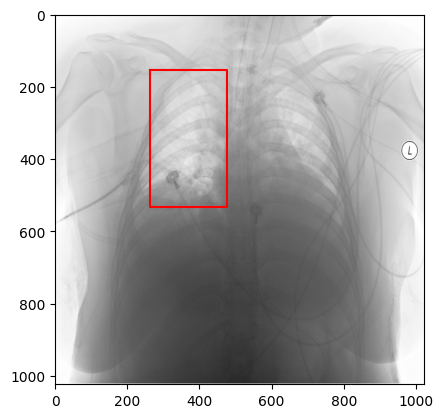

In [ ]:
patient_df = dataset_df[dataset_df.Target == 1].iloc[0]
image_dir = f'{DATA_PATH}/data/rsna-pneumonia-detection-challenge/images'
img_path = os.path.join(image_dir, "{}.dcm".format(patient_df.patientId))

plt.imshow(pydicom.dcmread(img_path).pixel_array, 'Greys')

img_size = 1024
x, y, w, h = patient_df[['x', 'y', 'width', 'height']].values
plt.plot([x, x, x+w, x+w, x], [y, y+h, y+h, y, y], 'red')

In [ ]:
patient_df

patientId    00436515-870c-4b36-a041-de91049b9ab4
x                                           264.0
y                                           152.0
width                                       213.0
height                                      379.0
Target                                          1
Name: 4, dtype: object

In [ ]:
patient_list = dataset_df['patientId'].unique()

patient_train, patient_test = train_test_split(
    patient_list, # List or array to split
    test_size=0.2, # Size of the subset
    random_state=42)

patient_train, patient_val = train_test_split(
    patient_train,
    test_size=0.1 / 0.8,
    random_state=42)

train_df = dataset_df.loc[dataset_df['patientId'].isin(patient_train)]
val_df = dataset_df.loc[dataset_df['patientId'].isin(patient_val)]
test_df = dataset_df.loc[dataset_df['patientId'].isin(patient_test)]

train_df_pos = train_df[train_df.Target == 1]
val_df_pos = val_df[val_df.Target == 1]
test_df_pos = test_df[test_df.Target == 1]

train_dataset = PredictionDataset(train_df_pos, image_dir)
val_dataset = PredictionDataset(val_df_pos, image_dir)
test_dataset = PredictionDataset(test_df_pos, image_dir)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True,
    collate_fn = utils.collate_fn
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=1,
    shuffle=False,
    collate_fn = utils.collate_fn
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    collate_fn = utils.collate_fn
)

## Load model

In this exercise, we will use Faster R-CNN. This network integrates a Region Proposal Network (RPN) directly into a two-stage detection framework. In the first stage, the RPN slides small convolutional windows over the shared feature map to generate objectness scores and bounding-box proposals. In the second stage, each proposal is cropped and reshaped via RoI pooling (or RoI Align) and passed through fully connected layers to predict refined box coordinates and classification probabilities.

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/dgaviria/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160M/160M [00:00<00:00, 404MB/s]


Let's observe what is the output of the model:

In [ ]:
# For Training
images, targets = next(iter(train_dataloader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

{'loss_classifier': tensor(0.2271, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.1144, grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0947, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0138, grad_fn=<DivBackward0>)}


<div class="alert alert-block alert-info">
<b>Q6.</b> The bounding boxes are provided as (<code>x, y, width, height</code>). In the <code>Dataset</code> class, we convert them to (<code>x_min, y_min, x_max, y_max</code>) format. Why might this format be useful in practice?
</div>

<div class="alert alert-block alert-success">
Some detection frameworks expect <code>(x_min, y_min, x_max, y_max)</code> for compatibility with IoU and anchor-based matching logic.
</div>

Here, we train a FASTER-RCNN model for detection of pneumonia. Observe the following code:

In [ ]:
# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and pneumonia
num_classes = 2

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

num_epochs = 5
model.to(device)

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_dataloader, device, epoch, print_freq=1000)
    # update the learning rate
    lr_scheduler.step()

torch.save(model.state_dict(), './fasterrcnn_resnet50_fpn.pth')

Epoch: [0]  [  0/526]  eta: 0:03:44  lr: 0.000015  loss: 0.3717 (0.3717)  loss_classifier: 0.1702 (0.1702)  loss_box_reg: 0.0714 (0.0714)  loss_objectness: 0.1202 (0.1202)  loss_rpn_box_reg: 0.0099 (0.0099)  time: 0.4265  data: 0.1431  max mem: 5679
Epoch: [0]  [525/526]  eta: 0:00:00  lr: 0.005000  loss: 0.2834 (0.2981)  loss_classifier: 0.1056 (0.1182)  loss_box_reg: 0.1688 (0.1564)  loss_objectness: 0.0090 (0.0171)  loss_rpn_box_reg: 0.0056 (0.0064)  time: 0.4156  data: 0.2091  max mem: 5844
Epoch: [0] Total time: 0:04:30 (0.5139 s / it)
Epoch: [1]  [  0/526]  eta: 0:04:27  lr: 0.005000  loss: 0.2875 (0.2875)  loss_classifier: 0.0983 (0.0983)  loss_box_reg: 0.1743 (0.1743)  loss_objectness: 0.0034 (0.0034)  loss_rpn_box_reg: 0.0115 (0.0115)  time: 0.5088  data: 0.2988  max mem: 5844
Epoch: [1]  [525/526]  eta: 0:00:00  lr: 0.005000  loss: 0.2873 (0.2773)  loss_classifier: 0.1007 (0.1050)  loss_box_reg: 0.1628 (0.1573)  loss_objectness: 0.0090 (0.0095)  loss_rpn_box_reg: 0.0042 (0.00

In [ ]:
def calculate_precision(gts, preds, threshold = 0.5, form = 'coco', ious=None) -> float:
    # https://www.kaggle.com/sadmanaraf/wheat-detection-using-faster-rcnn-train
    """Calculates precision for GT - prediction pairs at one threshold.

    Args:
        gts: (List[List[Union[int, float]]]) Coordinates of the available ground-truth boxes
        preds: (List[List[Union[int, float]]]) Coordinates of the predicted boxes,
               sorted by confidence value (descending)
        threshold: (float) Threshold
        form: (str) Format of the coordinates
        ious: (np.ndarray) len(gts) x len(preds) matrix for storing calculated ious.

    Return:
        (float) Precision
    """
    n = len(preds)
    tp = 0
    fp = 0

    for pred_idx in range(n):

        best_match_gt_idx = find_best_match(gts, preds[pred_idx], pred_idx,
                                            threshold=threshold, form=form, ious=ious)

        if best_match_gt_idx >= 0:
            # True positive: The predicted box matches a gt box with an IoU above the threshold.
            tp += 1
            # Remove the matched GT box
            gts[best_match_gt_idx] = -1
        else:
            # No match
            # False positive: indicates a predicted box had no associated gt box.
            fp += 1

    # False negative: indicates a gt box had no associated predicted box.
    fn = (gts.sum(axis=1) > 0).sum()

    return tp / (tp + fp + fn)

def calculate_image_precision(gts, preds, thresholds = (0.5, ), form = 'coco') -> float:
    # https://www.kaggle.com/sadmanaraf/wheat-detection-using-faster-rcnn-train
    """Calculates image precision.

    Args:
        gts: (List[List[Union[int, float]]]) Coordinates of the available ground-truth boxes
        preds: (List[List[Union[int, float]]]) Coordinates of the predicted boxes,
               sorted by confidence value (descending)
        thresholds: (float) Different thresholds
        form: (str) Format of the coordinates

    Return:
        (float) Precision
    """
    n_threshold = len(thresholds)
    image_precision = 0.0

    ious = np.ones((len(gts), len(preds))) * -1
    # ious = None

    for threshold in thresholds:
        precision_at_threshold = calculate_precision(gts.copy(), preds, threshold=threshold,
                                                     form=form, ious=ious)
        image_precision += precision_at_threshold / n_threshold

    return image_precision

def find_best_match(gts, pred, pred_idx, threshold = 0.5, form = 'pascal_voc', ious=None) -> int:
    # https://www.kaggle.com/sadmanaraf/wheat-detection-using-faster-rcnn-train
    """Returns the index of the 'best match' between the
    ground-truth boxes and the prediction. The 'best match'
    is the highest IoU. (0.0 IoUs are ignored).

    Args:
        gts: (List[List[Union[int, float]]]) Coordinates of the available ground-truth boxes
        pred: (List[Union[int, float]]) Coordinates of the predicted box
        pred_idx: (int) Index of the current predicted box
        threshold: (float) Threshold
        form: (str) Format of the coordinates
        ious: (np.ndarray) len(gts) x len(preds) matrix for storing calculated ious.

    Return:
        (int) Index of the best match GT box (-1 if no match above threshold)
    """
    best_match_iou = -np.inf
    best_match_idx = -1
    for gt_idx in range(len(gts)):

        if gts[gt_idx][0] < 0:
            # Already matched GT-box
            continue

        iou = -1 if ious is None else ious[gt_idx][pred_idx]

        if iou < 0:
            iou = calculate_iou(gts[gt_idx], pred, form=form)

            if ious is not None:
                ious[gt_idx][pred_idx] = iou

        if iou < threshold:
            continue

        if iou > best_match_iou:
            best_match_iou = iou
            best_match_idx = gt_idx

    return best_match_idx

def calculate_iou(gt, pr, form='pascal_voc') -> float:
    # https://www.kaggle.com/sadmanaraf/wheat-detection-using-faster-rcnn-train
    """Calculates the Intersection over Union.

    Args:
        gt: (np.ndarray[Union[int, float]]) coordinates of the ground-truth box
        pr: (np.ndarray[Union[int, float]]) coordinates of the prdected box
        form: (str) gt/pred coordinates format
            - pascal_voc: [xmin, ymin, xmax, ymax]
            - coco: [xmin, ymin, w, h]
    Returns:
        (float) Intersection over union (0.0 <= iou <= 1.0)
    """
    if form == 'coco':
        gt = gt.copy()
        pr = pr.copy()

        gt[2] = gt[0] + gt[2]
        gt[3] = gt[1] + gt[3]
        pr[2] = pr[0] + pr[2]
        pr[3] = pr[1] + pr[3]

    # Calculate overlap area
    dx = min(gt[2], pr[2]) - max(gt[0], pr[0]) + 1

    if dx < 0:
        return 0.0
    dy = min(gt[3], pr[3]) - max(gt[1], pr[1]) + 1

    if dy < 0:
        return 0.0

    overlap_area = dx * dy

    # Calculate union area
    union_area = (
            (gt[2] - gt[0] + 1) * (gt[3] - gt[1] + 1) +
            (pr[2] - pr[0] + 1) * (pr[3] - pr[1] + 1) -
            overlap_area
    )

    return overlap_area / union_area

In [ ]:
precisions = []
model = torchvision.models.detection.fasterrcnn_resnet50_fpn()
model.load_state_dict(torch.load('./fasterrcnn_resnet50_fpn.pth', map_location=torch.device(device)))
model.eval()
model.to(device)
with torch.no_grad():
  for images, targets in val_dataloader:
    images = [img.to(device) for img in images]
    outputs = model(images)
    for tgt, out in zip(targets, outputs):
      gt_boxes   = tgt['boxes'].cpu().numpy()
      pred_boxes = out['boxes'].cpu().numpy()
      pred_scores= out['scores'].cpu().numpy()
      # filter by a threshold, e.g. keep only scores > 0.5:
      keep = pred_scores > 0.7
      pred_boxes = pred_boxes[keep]
      precisions.append(
        calculate_image_precision(gt_boxes, pred_boxes)
      )
print("Average precision:", np.mean(precisions))


Average precision: 0.6572952710495963


<div class="alert alert-block alert-info">
<b>Q9.</b> The RSNA challenge uses IoU (Intersection over Union) and mAP (mean Average Precision). Implement IoU between two bounding boxes and compute the score on validation data. Why is IoU a better fit than accuracy for detection?
</div>

<div class="alert alert-block alert-success">
It evaluates spatial overlap, not just correctness of presence/absence, which is crucial for localizing lesions.
</div>

In [ ]:
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = interArea / float(box1Area + box2Area - interArea)
    return iou

<div class="alert alert-block alert-info">
<b>Conclude.</b> Evaluate the performance of the model based on multiple criterias, including computing time.
</div>

In [ ]:
def evaluate_model(model, dataloader, device, iou_threshold=0.4, conf_threshold=0.7):
    model.eval()
    all_precisions = []
    all_recalls = []
    all_ious = []

    with torch.no_grad():
        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            outputs = model(images)

            for pred, target in zip(outputs, targets):
                gt_boxes = target['boxes'].cpu().numpy()
                pred_boxes = pred['boxes'].cpu().numpy()
                pred_scores = pred['scores'].cpu().numpy()

                # Filter by confidence
                pred_boxes = pred_boxes[pred_scores > conf_threshold]

                # Compute IoUs
                matched = set()
                ious = []
                for gt_box in gt_boxes:
                    best_iou = 0
                    for i, pred_box in enumerate(pred_boxes):
                        if i in matched:
                            continue
                        iou = compute_iou(gt_box, pred_box)
                        if iou > best_iou:
                            best_iou = iou
                            best_idx = i
                    if best_iou >= iou_threshold:
                        matched.add(best_idx)
                        ious.append(best_iou)

                TP = len(matched)
                FP = len(pred_boxes) - TP
                FN = len(gt_boxes) - TP

                precision = TP / (TP + FP) if (TP + FP) > 0 else 0
                recall = TP / (TP + FN) if (TP + FN) > 0 else 0

                all_precisions.append(precision)
                all_recalls.append(recall)
                all_ious.extend(ious)

    return {
        "precision": np.mean(all_precisions),
        "recall": np.mean(all_recalls),
        "mean_iou": np.mean(all_ious) if all_ious else 0
    }

Evaluate Faster R-CNN on test set

In [ ]:
faster_rcnn_model = torchvision.models.detection.fasterrcnn_resnet50_fpn()
faster_rcnn_model.load_state_dict(torch.load('./fasterrcnn_resnet50_fpn.pth'))
faster_rcnn_model.to(device)
faster_rcnn_results = evaluate_model(faster_rcnn_model, test_dataloader, device=device)

# Print
print("Faster R-CNN Results:")
print(f"Precision: {faster_rcnn_results['precision']:.3f}")
print(f"Recall: {faster_rcnn_results['recall']:.3f}")
print(f"Mean IoU: {faster_rcnn_results['mean_iou']:.3f}\n")

Faster R-CNN Results:
Precision: 0.640
Recall: 0.777
Mean IoU: 0.661



In [ ]:
import matplotlib.patches as patches

def plot_detections(image_tensor, prediction, gt, score_threshold=0.5, label_map=None):
    """
    image_tensor: torch.Tensor (3, H, W), unnormalized image
    prediction: dict with 'boxes', 'labels', 'scores' from model
    score_threshold: minimum score to show a box
    label_map: optional dict to map label indices to class names
    """
    image = image_tensor.permute(1, 2, 0).cpu().numpy()  # (H, W, 3)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image)

    boxes = prediction["boxes"].cpu()
    scores = prediction["scores"].cpu()
    labels = prediction["labels"].cpu()

    for box in gt:
        xmin, ymin, xmax, ymax = box
        width, height = xmax - xmin, ymax - ymin

        rect = patches.Rectangle((xmin, ymin), width, height,
                                 linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 5, f"Ground truth",
                color='white', fontsize=10,
                bbox=dict(facecolor='green', edgecolor='none', pad=1))

    for box, score, label in zip(boxes, scores, labels):
        if score < score_threshold:
            continue

        xmin, ymin, xmax, ymax = box
        width, height = xmax - xmin, ymax - ymin

        rect = patches.Rectangle((xmin, ymin), width, height,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        label_str = f"{label.item()}"
        if label_map:
            label_str = label_map.get(label.item(), str(label.item()))

        ax.text(xmin, ymin - 5, f"{label_str}: {score:.2f}",
                color='white', fontsize=10,
                bbox=dict(facecolor='red', edgecolor='none', pad=1))

    ax.axis("off")
    plt.show()

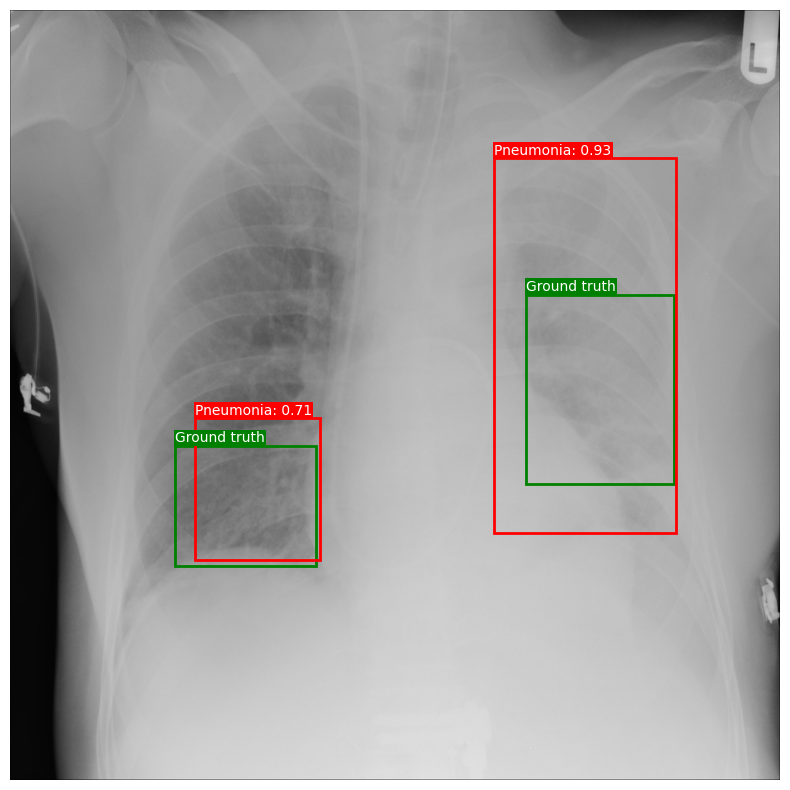

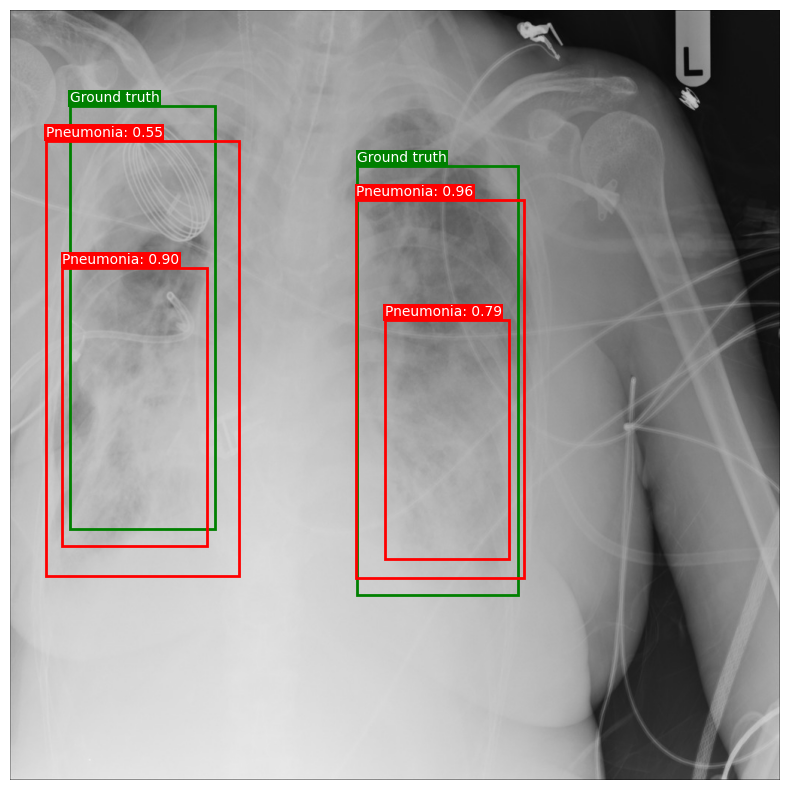

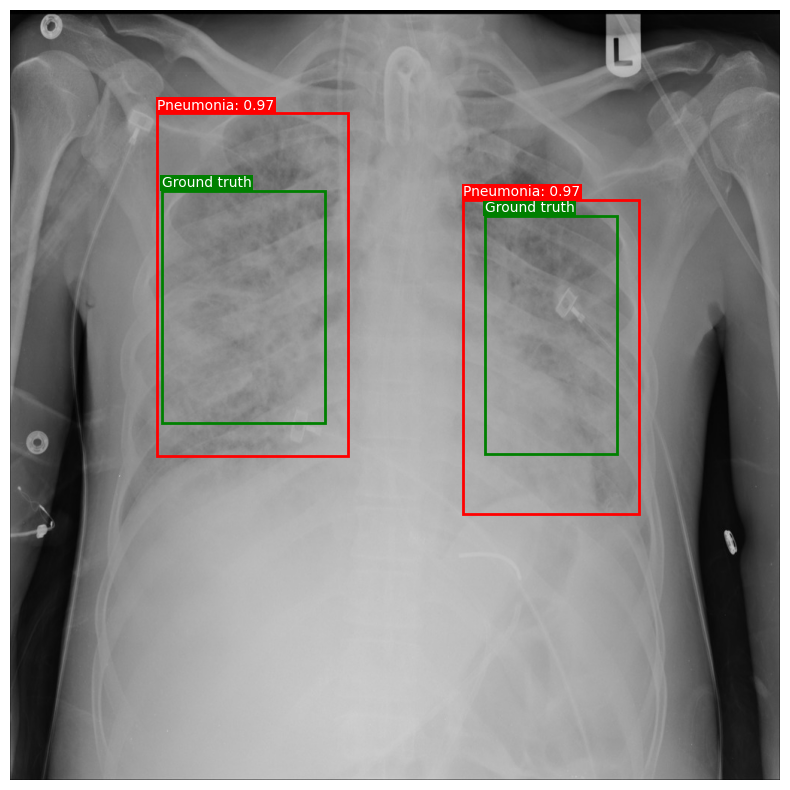

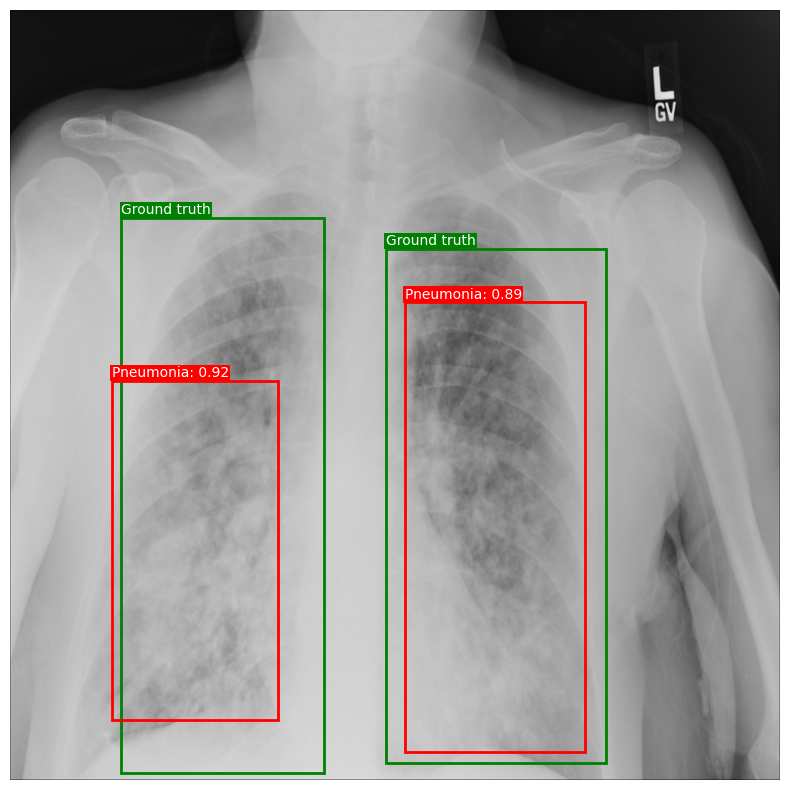

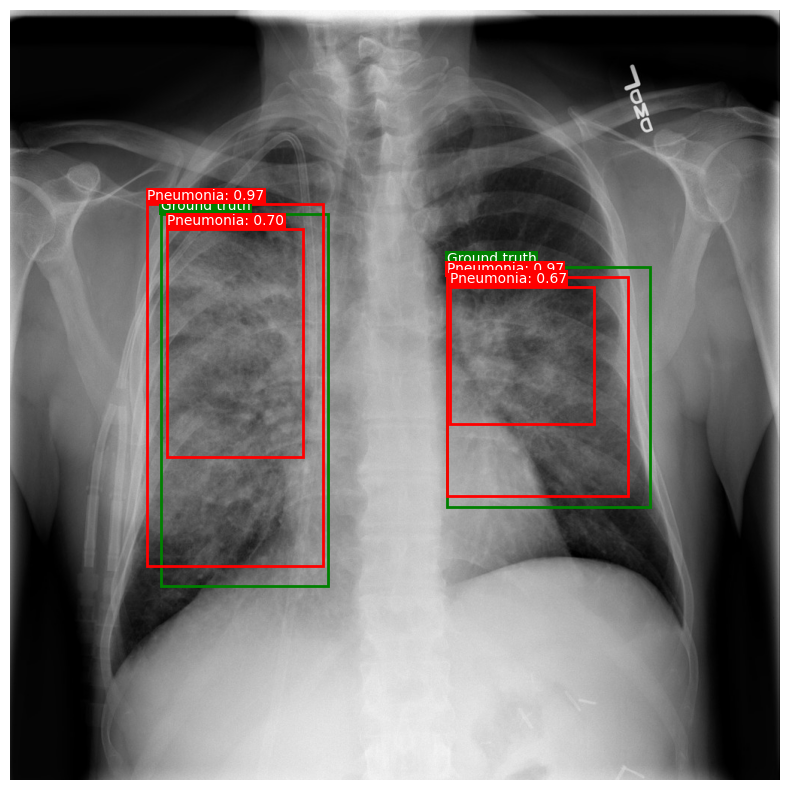

In [ ]:
label_map = {1: "Pneumonia"}
num_examples_to_plot = 5

test_dataloader = DataLoader(test_dataset,batch_size=1,shuffle=True,collate_fn = utils.collate_fn)

with torch.no_grad():
    plotted_count = 0
    for images, targets in test_dataloader:
        if plotted_count >= num_examples_to_plot:
            break

        images = list(image.to(device) for image in images)
        outputs = model(images)

        for i in range(len(images)):
            if plotted_count >= num_examples_to_plot:
                break

            gt = targets[i]['boxes'].cpu()
            plot_detections(images[i].cpu(), outputs[i], gt, label_map=label_map)
            plotted_count += 1
